In [65]:
!pip install mplfinance

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from sklearn.feature_selection import mutual_info_regression

In [67]:
df = pd.read_csv('/kaggle/input/forexsoftware-historical-forex-data/Historical Forex Data/EURUSD_D1.csv')

In [68]:
df.head()

,Time,Open,High,Low,Close,Volume
0,27/08/2008 0:00,1.47356,1.47438,1.46625,1.47430,351296
1,28/08/2008 0:00,1.47462,1.48103,1.46691,1.47013,866737
2,29/08/2008 0:00,1.47026,1.47674,1.46368,1.46714,828348
3,31/08/2008 0:00,1.46748,1.47198,1.46748,1.46967,33247
4,01/09/2008 0:00,1.46962,1.47029,1.45543,1.45810,864080


In [69]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)

In [70]:
df.tail()

,Time,Open,High,Low,Close,Volume
5009,2024-09-01,1.10462,1.10496,1.10440,1.10446,8177
5010,2024-09-02,1.10445,1.10773,1.10419,1.10670,133709
5011,2024-09-03,1.10671,1.10702,1.10263,1.10485,254603
5012,2024-09-04,1.10485,1.10951,1.10400,1.10801,213738
5013,2024-09-05,1.10800,1.10903,1.10746,1.10871,49906


In [71]:
df.describe()

,Time,Open,High,Low,Close,Volume
count,5014,5014.000000,5014.000000,5014.000000,5014.000000,5.014000e+03
mean,2016-08-30 18:26:33.936976384,1.208638,1.213090,1.204215,1.208601,2.185290e+05
min,2008-08-27 00:00:00,0.959530,0.967070,0.953570,0.959530,3.000000e+00
25%,2012-08-28 06:00:00,1.104442,1.108375,1.101107,1.104470,8.066250e+04
50%,2016-08-30 12:00:00,1.177365,1.180515,1.173950,1.177410,1.878390e+05
75%,2020-09-01 18:00:00,1.317183,1.321785,1.311047,1.317200,2.614745e+05
max,2024-09-05 00:00:00,1.512570,1.514410,1.503440,1.512520,1.723532e+06
std,NaN,0.123327,0.124223,0.122311,0.123274,2.092741e+05


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    5014 non-null   datetime64[ns]
 1   Open    5014 non-null   float64       
 2   High    5014 non-null   float64       
 3   Low     5014 non-null   float64       
 4   Close   5014 non-null   float64       
 5   Volume  5014 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 235.2 KB


In [73]:
df.isna().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [74]:
df.isnull().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Visualization

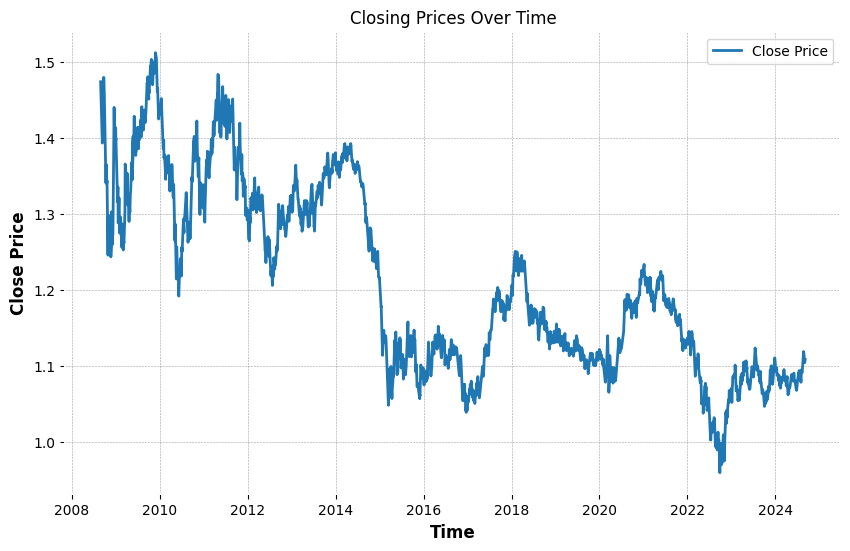

In [75]:
# 1. Line Chart for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Close'], label='Close Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

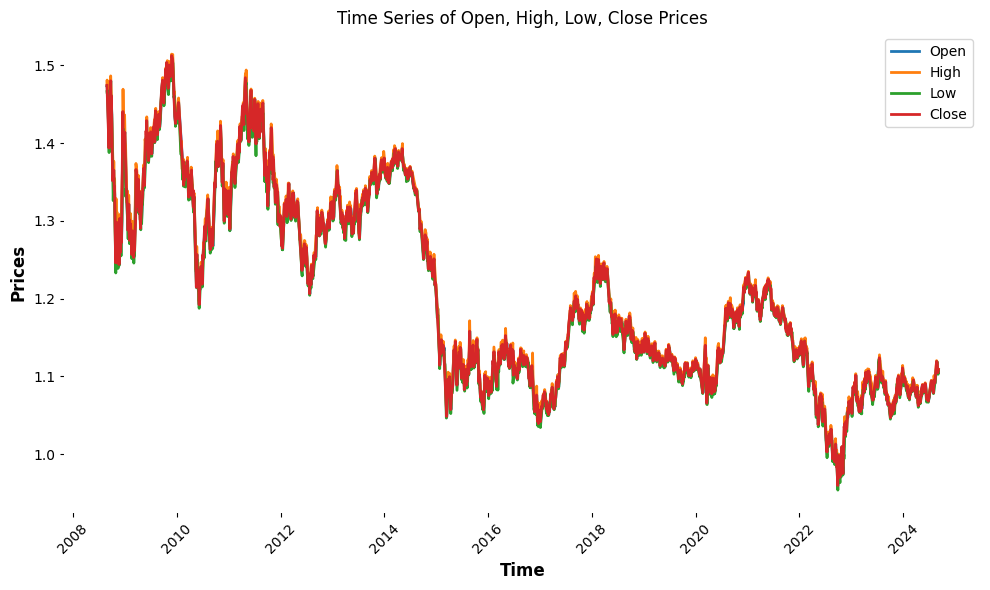

In [76]:
# Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Open'], label='Open')
plt.plot(df['Time'], df['High'], label='High')
plt.plot(df['Time'], df['Low'], label='Low')
plt.plot(df['Time'], df['Close'], label='Close')
plt.title('Time Series of Open, High, Low, Close Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


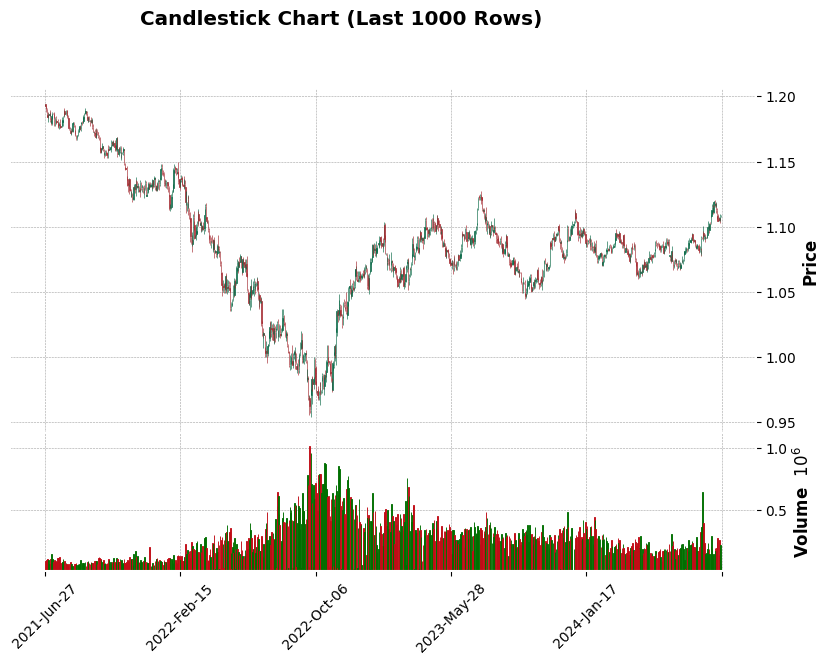

In [77]:
# Subset the last 1000 rows
subset_df = df[-1000:]  # You can adjust the number of rows here

# Set the 'Time' as the index for plotting
subset_df.set_index('Time', inplace=True)

# Plot the subset of data
mpf.plot(subset_df, type='candle', volume=True, style='charles', title='Candlestick Chart (Last 1000 Rows)',figratio=(12,8), figscale=1.2)


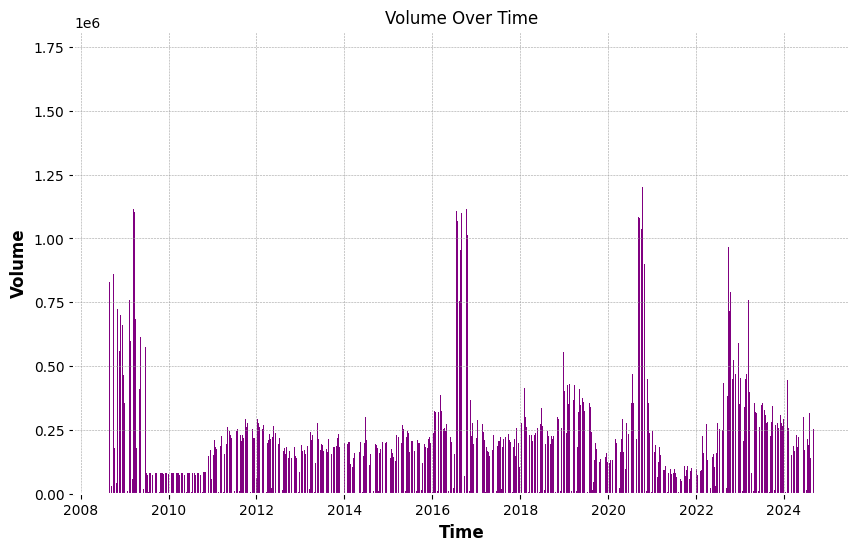

In [78]:
# 3. Volume Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(df['Time'], df['Volume'], color='purple')
plt.title('Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


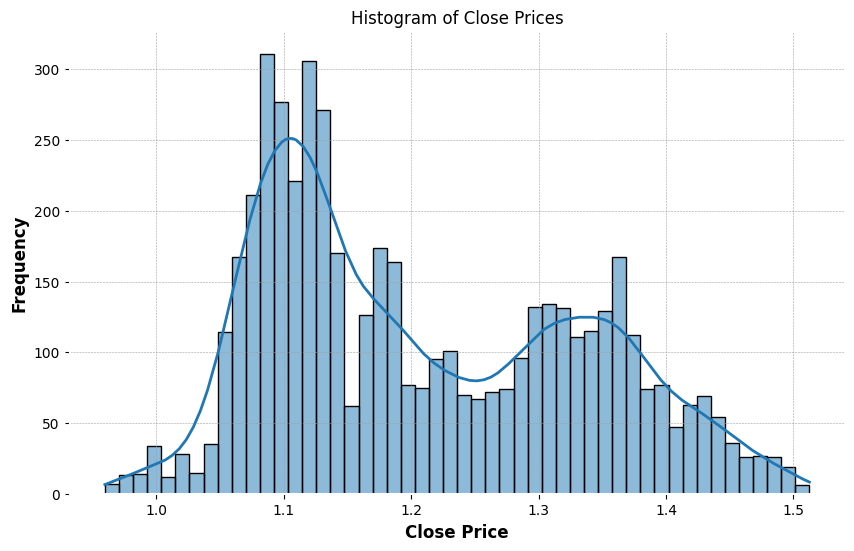

In [79]:
# 5. Histogram of Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

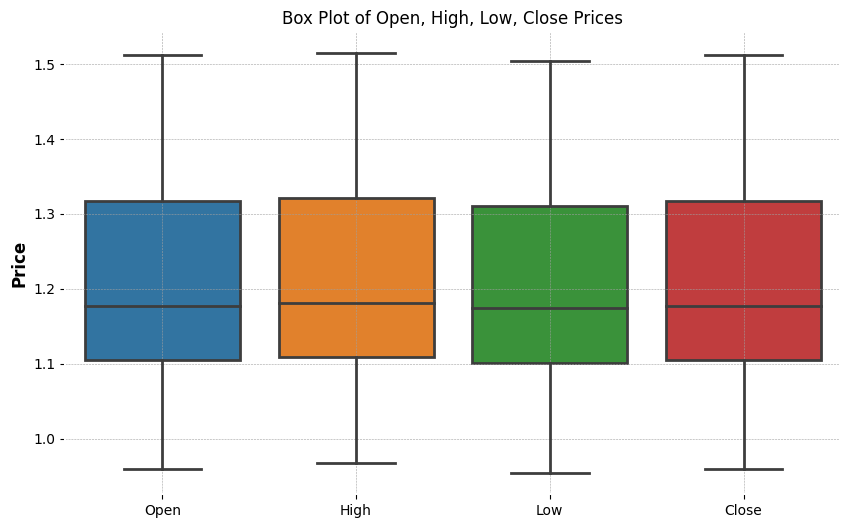

In [80]:
# 6. Box Plot for Price Types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of Open, High, Low, Close Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

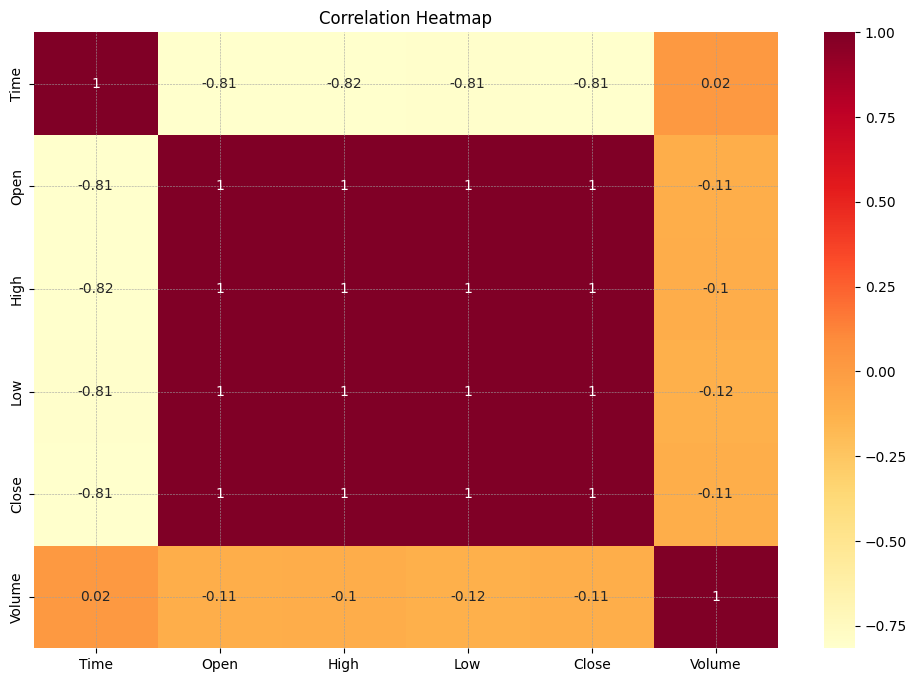

In [81]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

**Creating more features**

In [82]:
# 1. High-Low Range
df['High_Low_Range'] = df['High'] - df['Low']

# 2. Open-High Range
df['Open_High_Range'] = df['High'] - df['Open']

# 3. Open-Low Range
df['Open_Low_Range'] = df['Open'] - df['Low']

# 4. Rolling Volatility (using a 3-period window)
df['Rolling_Volatility'] = df[['Open', 'High', 'Low']].std(axis=1).rolling(window=3).mean()

# 5. True Range
df['True_Range'] = df.apply(lambda row: max(row['High'] - row['Low'], abs(row['High'] - row['Open']), abs(row['Low'] - row['Open'])), axis=1)

# 6. Moving Averages (SMA)
df['SMA_Open_3'] = df['Open'].rolling(window=3).mean()  # 3-period SMA of Open
df['SMA_High_3'] = df['High'].rolling(window=3).mean()  # 3-period SMA of High

# 7. Price Momentum (for Open and High, lag of 1 period)
df['Momentum_Open_1'] = df['Open'] - df['Open'].shift(1)
df['Momentum_High_1'] = df['High'] - df['High'].shift(1)

# 8. Exponential Moving Average (EMA) for Open (with a smoothing factor, alpha)
df['EMA_Open'] = df['Open'].ewm(span=3, adjust=False).mean()  # 3-period EMA of Open

# 9. Volume Change (percentage change)
df['Volume_Change'] = df['Volume'].pct_change() * 100

# 10. Moving Average of Volume (SMA)
df['SMA_Volume_3'] = df['Volume'].rolling(window=3).mean()

# 11. Lagged features for Open, High, Low, and Volume (lag of 1 period)
df['Lagged_Open_1'] = df['Open'].shift(1)
df['Lagged_High_1'] = df['High'].shift(1)
df['Lagged_Low_1'] = df['Low'].shift(1)
df['Lagged_Volume_1'] = df['Volume'].shift(1)

# Display the resulting DataFrame with new features
print(df)


           Time     Open     High      Low    Close  Volume  High_Low_Range  \
0    2008-08-27  1.47356  1.47438  1.46625  1.47430  351296         0.00813   
1    2008-08-28  1.47462  1.48103  1.46691  1.47013  866737         0.01412   
2    2008-08-29  1.47026  1.47674  1.46368  1.46714  828348         0.01306   
3    2008-08-31  1.46748  1.47198  1.46748  1.46967   33247         0.00450   
4    2008-09-01  1.46962  1.47029  1.45543  1.45810  864080         0.01486   
...         ...      ...      ...      ...      ...     ...             ...   
5009 2024-09-01  1.10462  1.10496  1.10440  1.10446    8177         0.00056   
5010 2024-09-02  1.10445  1.10773  1.10419  1.10670  133709         0.00354   
5011 2024-09-03  1.10671  1.10702  1.10263  1.10485  254603         0.00439   
5012 2024-09-04  1.10485  1.10951  1.10400  1.10801  213738         0.00551   
5013 2024-09-05  1.10800  1.10903  1.10746  1.10871   49906         0.00157   

      Open_High_Range  Open_Low_Range  Rolling_Vola

In [83]:
df.head()

,Time,Open,High,Low,Close,Volume,High_Low_Range,Open_High_Range,Open_Low_Range,Rolling_Volatility,...,SMA_High_3,Momentum_Open_1,Momentum_High_1,EMA_Open,Volume_Change,SMA_Volume_3,Lagged_Open_1,Lagged_High_1,Lagged_Low_1,Lagged_Volume_1
0,2008-08-27,1.47356,1.47438,1.46625,1.47430,351296,0.00813,0.00082,0.00731,NaN,...,NaN,NaN,NaN,1.473560,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-08-28,1.47462,1.48103,1.46691,1.47013,866737,0.01412,0.00641,0.00771,NaN,...,NaN,0.00106,0.00665,1.474090,146.725553,NaN,1.47356,1.47438,1.46625,351296.0
2,2008-08-29,1.47026,1.47674,1.46368,1.46714,828348,0.01306,0.00648,0.00658,0.006025,...,1.477383,-0.00436,-0.00429,1.472175,-4.429141,682127.000000,1.47462,1.48103,1.46691,866737.0
3,2008-08-31,1.46748,1.47198,1.46748,1.46967,33247,0.00450,0.00450,0.00000,0.005399,...,1.476583,-0.00278,-0.00476,1.469828,-95.986349,576110.666667,1.47026,1.47674,1.46368,828348.0
4,2008-09-01,1.46962,1.47029,1.45543,1.45810,864080,0.01486,0.00067,0.01419,0.005840,...,1.473003,0.00214,-0.00169,1.469724,2498.971336,575225.000000,1.46748,1.47198,1.46748,33247.0


In [84]:
df.isnull().sum()

Time                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
High_Low_Range        0
Open_High_Range       0
Open_Low_Range        0
Rolling_Volatility    2
True_Range            0
SMA_Open_3            2
SMA_High_3            2
Momentum_Open_1       1
Momentum_High_1       1
EMA_Open              0
Volume_Change         1
SMA_Volume_3          2
Lagged_Open_1         1
Lagged_High_1         1
Lagged_Low_1          1
Lagged_Volume_1       1
dtype: int64

In [85]:
df.dropna(inplace=True) 

In [86]:
df.isnull().sum()

Time                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
High_Low_Range        0
Open_High_Range       0
Open_Low_Range        0
Rolling_Volatility    0
True_Range            0
SMA_Open_3            0
SMA_High_3            0
Momentum_Open_1       0
Momentum_High_1       0
EMA_Open              0
Volume_Change         0
SMA_Volume_3          0
Lagged_Open_1         0
Lagged_High_1         0
Lagged_Low_1          0
Lagged_Volume_1       0
dtype: int64

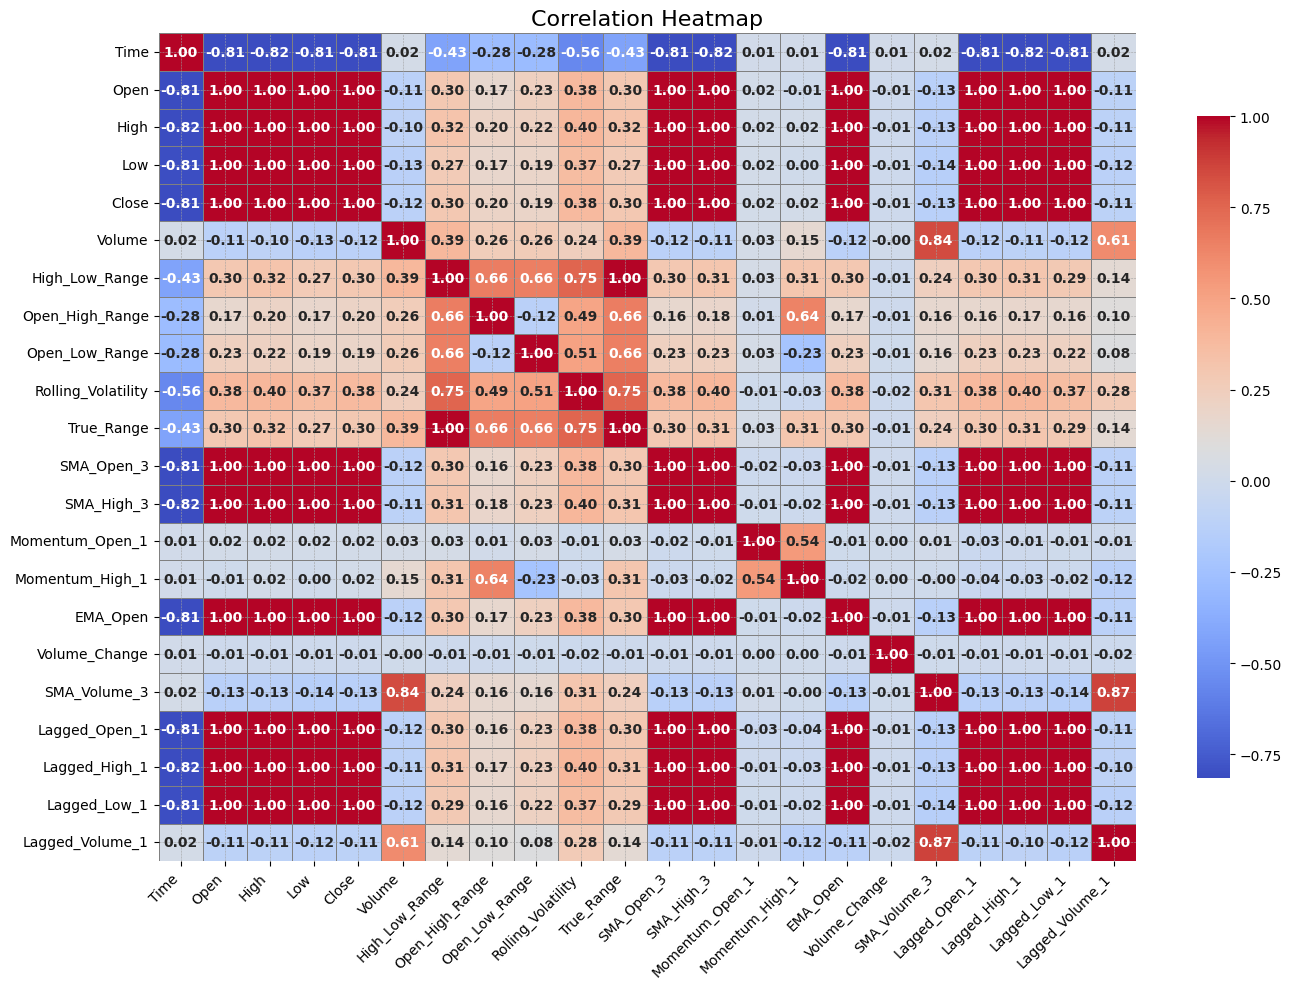

In [87]:
plt.figure(figsize=(14, 10)) 

corr = df.corr()
ax = sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    annot_kws={"size": 10, "weight": 'bold'}, 
    linewidths=0.5, 
    linecolor='gray',
    cbar_kws={"shrink": .8}  
)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  

plt.tight_layout()
plt.show()

In [88]:
# Extract the target column
target = 'Close'

# Calculate Correlation with target column
correlation = df.corr()[target]

# Calculate Mutual Information
# Ensure that data types are numeric for mutual_info_regression
numeric_features = df.select_dtypes(include=[np.number])
X = numeric_features.drop(columns=[target])
y = df[target]

# Calculate mutual information
mi = mutual_info_regression(X, y)

# Create a DataFrame to hold mutual information values
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mi
})

# Merge mutual information with correlation
results = pd.DataFrame({
    'Correlation': correlation.drop(target),
    'Mutual_Information': mi_df.set_index('Feature')['Mutual_Information']
})

# Display results
print(results)

                    Correlation  Mutual_Information
EMA_Open               0.998136            2.699809
High                   0.999267            3.524880
High_Low_Range         0.296865            0.103060
Lagged_High_1          0.997804            2.685168
Lagged_Low_1           0.997879            2.689402
Lagged_Open_1          0.997160            2.536188
Lagged_Volume_1       -0.113211            0.261869
Low                    0.999294            3.548480
Momentum_High_1        0.020824            0.033757
Momentum_Open_1        0.019224            0.035729
Open                   0.998595            2.896877
Open_High_Range        0.201126            0.030001
Open_Low_Range         0.191647            0.013044
Rolling_Volatility     0.382610            0.180307
SMA_High_3             0.998424            2.841759
SMA_Open_3             0.997808            2.637820
SMA_Volume_3          -0.134231            0.236853
Time                  -0.810541                 NaN
True_Range  

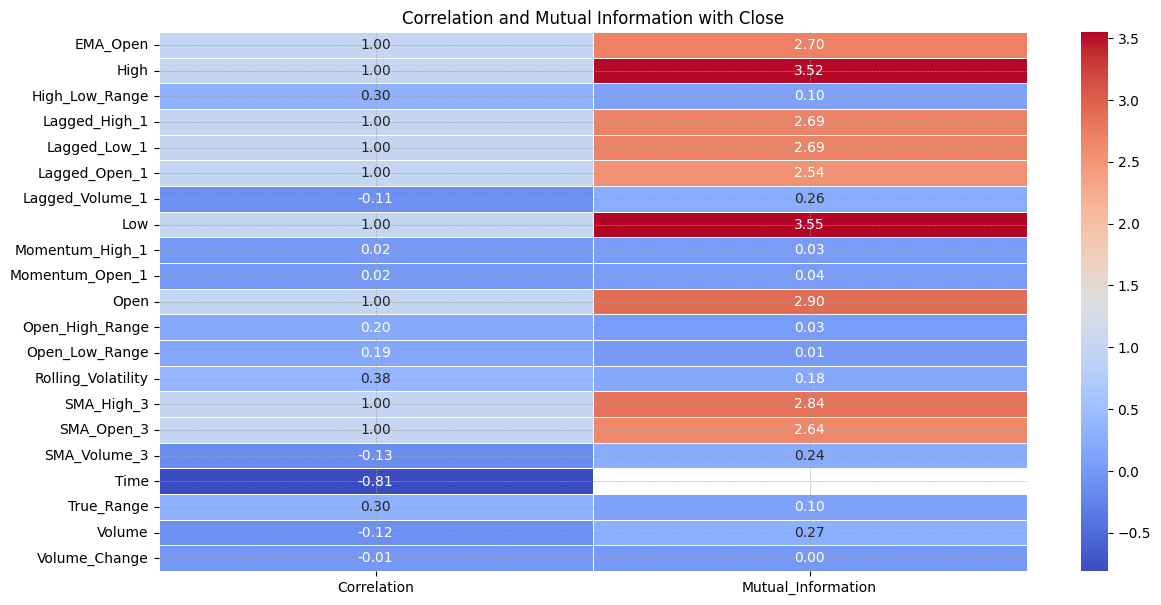

In [89]:
# Plotting the results
plt.figure(figsize=(14, 7))
sns.heatmap(results, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation and Mutual Information with Close')
plt.show()

In [90]:
df.head()

,Time,Open,High,Low,Close,Volume,High_Low_Range,Open_High_Range,Open_Low_Range,Rolling_Volatility,...,SMA_High_3,Momentum_Open_1,Momentum_High_1,EMA_Open,Volume_Change,SMA_Volume_3,Lagged_Open_1,Lagged_High_1,Lagged_Low_1,Lagged_Volume_1
2,2008-08-29,1.47026,1.47674,1.46368,1.46714,828348,0.01306,0.00648,0.00658,0.006025,...,1.477383,-0.00436,-0.00429,1.472175,-4.429141,682127.000000,1.47462,1.48103,1.46691,866737.0
3,2008-08-31,1.46748,1.47198,1.46748,1.46967,33247,0.00450,0.00450,0.00000,0.005399,...,1.476583,-0.00278,-0.00476,1.469828,-95.986349,576110.666667,1.47026,1.47674,1.46368,828348.0
4,2008-09-01,1.46962,1.47029,1.45543,1.45810,864080,0.01486,0.00067,0.01419,0.005840,...,1.473003,0.00214,-0.00169,1.469724,2498.971336,575225.000000,1.46748,1.47198,1.46748,33247.0
5,2008-09-02,1.45808,1.45981,1.44626,1.44873,863699,0.01355,0.00173,0.01182,0.006122,...,1.467360,-0.01154,-0.01048,1.463902,-0.044093,587008.666667,1.46962,1.47029,1.45543,864080.0
6,2008-09-03,1.44866,1.45219,1.43811,1.45129,865385,0.01408,0.00353,0.01055,0.007698,...,1.460763,-0.00942,-0.00762,1.456281,0.195207,864388.000000,1.45808,1.45981,1.44626,863699.0


In [91]:
df.dtypes

Time                  datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                         int64
High_Low_Range               float64
Open_High_Range              float64
Open_Low_Range               float64
Rolling_Volatility           float64
True_Range                   float64
SMA_Open_3                   float64
SMA_High_3                   float64
Momentum_Open_1              float64
Momentum_High_1              float64
EMA_Open                     float64
Volume_Change                float64
SMA_Volume_3                 float64
Lagged_Open_1                float64
Lagged_High_1                float64
Lagged_Low_1                 float64
Lagged_Volume_1              float64
dtype: object

## Splitting the Data

In [92]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Next_Close' is the target column

# Separate features and target
X = df.drop(columns=['Close','Time'])
y = df['Close']

# First split: Train and temporary set (which will be further split into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 3508
Validation set size: 752
Testing set size: 752


## Training and Evaluating Models

**Linear Regression**

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import KFold

# Define the hyperparameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
    'positive':[True, False]
}

# Initialize the LinearRegression model
lr = LinearRegression()

# Setup the GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': True}


In [101]:
# Train the model with the best hyperparameters
best_lr = grid_search.best_estimator_

In [102]:
# Cross-Validation (using 5-fold cross-validation)
cv_scores = cross_val_score(best_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print Cross-Validation scores
print("Cross-Validation RMSE Scores: ", np.sqrt(-cv_scores))
print("Mean CV RMSE: ", np.mean(np.sqrt(-cv_scores)))

Cross-Validation RMSE Scores:  [0.00252532 0.00240732 0.00271479 0.00270972 0.0026225 ]
Mean CV RMSE:  0.0025959312235182093


In [103]:
# Predict on validation and test sets using the best model
y_val_pred = best_lr.predict(X_val)
y_test_pred = best_lr.predict(X_test)

In [104]:
# Evaluate the model performance on validation and test sets
print("Linear Regression with Best Hyperparameters")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred))}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred)}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")

Linear Regression with Best Hyperparameters
Validation RMSE: 0.002776509461968885
Validation R^2: 0.9994996752322424
Test RMSE: 0.00275563484108839
Test R^2: 0.9994962411906799
Test MAE: 0.0017949278565415271


**Random Forest Regressor**

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 500),  # Number of trees in the forest
    'max_depth': randint(5, 50),  # Maximum depth of the trees
    'min_samples_split': randint(2, 20),  # Minimum number of samples to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples in a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,  # Cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Best hyperparameters from RandomizedSearchCV
print("Best Hyperparameters: ", random_search.best_params_)

Best Hyperparameters:  {'bootstrap': False, 'max_depth': 34, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 363}


In [107]:
# Train the model with the best hyperparameters
best_rf = random_search.best_estimator_

In [108]:
# Predict on validation and test sets using the best model
y_val_pred = best_rf.predict(X_val)
y_test_pred = best_rf.predict(X_test)

# Evaluate the model performance on validation and test sets
print("Random Forest Regressor with Best Hyperparameters")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred))}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred)}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")

Random Forest Regressor with Best Hyperparameters
Validation RMSE: 0.0037355321853220183
Validation R^2: 0.9990943536271838
Test RMSE: 0.003362480470959488
Test R^2: 0.9992499350687108
Test MAE: 0.0023255912058202763


**XGBoost Regressor**

In [109]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint
import numpy as np

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 500),  # Number of boosting rounds (trees)
    'max_depth': randint(3, 15),  # Maximum tree depth for base learners
    'learning_rate': [0.001, 0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used for each tree
    'min_child_weight': randint(1, 10),  # Minimum sum of instance weight for a leaf node
    'gamma': [0, 0.1, 0.2, 0.3]  # Minimum loss reduction to make a further partition
}

# Initialize the XGBoost Regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgbr,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,  # Cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Best hyperparameters from RandomizedSearchCV
print("Best Hyperparameters: ", random_search.best_params_)

Best Hyperparameters:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 288, 'subsample': 0.6}


In [110]:
# Train the model with the best hyperparameters
best_xgbr = random_search.best_estimator_

In [111]:
# Predict on validation and test sets using the best model
y_val_pred = best_xgbr.predict(X_val)
y_test_pred = best_xgbr.predict(X_test)

# Evaluate the model performance on validation and test sets
print("XGBoost Regressor with Best Hyperparameters")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred))}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred)}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")

XGBoost Regressor with Best Hyperparameters
Validation RMSE: 0.0034214721512806972
Validation R^2: 0.9992402342606759
Test RMSE: 0.003149610622569341
Test R^2: 0.9993418982396028
Test MAE: 0.002162011660591086
